In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

dataPath = (os.getcwd().replace("\\", "/")) + "/자료/"
nonSharedDataPath = os.getcwd().replace("\\", "/") + "/../공유못함/"

# 자료부르기 예제
# df = pd.read_csv(dataPath + 'seoul_nav.csv', sep=',', encoding='utf8')
# df = pd.read_csv(nonSharedDataPath + '행정동별대중교통수단통합.csv', sep=',', encoding='euc-kr')

In [2]:
#이규민

In [21]:
carHavingDF = pd.read_csv(dataPath + '행정동별차량현황.csv', sep=',', encoding='euc-kr')
carMovingDF = pd.read_csv(dataPath + '행정동별통행량현황.csv', sep=',', encoding='euc-kr')
pubilcMovingDF = pd.read_csv(dataPath + '대중교통행정동별현황.csv', sep=',', encoding='euc-kr')

In [24]:
#평균재차인원 : 1.22 출처 : https://www.joongang.co.kr/article/22626529#home
carMovingDF = carMovingDF.reindex(columns=['일자', '통행량', '읍면동', '행정동코드', '시군구', '행정구코드'])
carMovingDF

,일자,통행량,읍면동,행정동코드,시군구,행정구코드
0,20220101,175685,가산동,금천구,1118051,11180
1,20220101,55845,개봉동,구로구,1117064,11170
2,20220101,210029,방화동,강서구,1116070,11160
3,20220101,83705,고덕동,강동구,1125055,11250
4,20220101,92723,공릉동,노원구,1111056,11110
...,...,...,...,...,...,...
8875,20220430,131216,합정동,마포구,1114068,11140
8876,20220430,69647,홍은동,서대문구,1113066,11130
8877,20220430,38330,화곡동,강서구,1116055,11160
8878,20220430,38329,황학동,중구,1102067,11020


In [23]:
pubilcMovingDF

,일자,승객수,읍면동,행정동코드,시군구,행정구코드
0,20220101,20524,사직동,1101053,종로구,11010
1,20220102,21701,사직동,1101053,종로구,11010
2,20220103,54331,사직동,1101053,종로구,11010
3,20220104,57510,사직동,1101053,종로구,11010
4,20220105,58347,사직동,1101053,종로구,11010
...,...,...,...,...,...,...
47058,20220426,1183,길동,1125074,강동구,11250
47059,20220427,16513,길동,1125074,강동구,11250
47060,20220428,16654,길동,1125074,강동구,11250
47061,20220429,17058,길동,1125074,강동구,11250


In [25]:
carHavingDF

,차종종별,연료,건수,비율,읍면동,행정동코드,시군구,행정구코드
0,승용,경유,36691,0.168009,여의동,1119054.0,영등포구,11190.0
1,승용,휘발유(무연),34512,0.158031,여의동,1119054.0,영등포구,11190.0
2,승용,휘발유,33805,0.154794,여의동,1119054.0,영등포구,11190.0
3,승용,휘발유(무연),28889,0.132283,역삼1동,1123064.0,강남구,11230.0
4,승용,휘발유(무연),28016,0.128286,가양1동,1116064.0,강서구,11160.0
...,...,...,...,...,...,...,...,...
19216,승용,휘발유(유연),1,0.000005,청량리동,1106080.0,동대문구,11060.0
19217,승합,기타연료,1,0.000005,청량리동,1106080.0,동대문구,11060.0
19218,승용,하이브리드(경유+전기),1,0.000005,불광1동,1112052.0,은평구,11120.0
19219,특수,휘발유,1,0.000005,일원본동,1123072.0,강남구,11230.0


In [53]:
coronaDF = pd.read_csv(dataPath + '행정구별코로나발생수.csv', encoding='euc-kr')
coronaDF

,자치구 기준일,종로구,종로구 추가,중구,중구 추가,용산구,용산구 추가,성동구,성동구 추가,광진구,...,서초구,서추구 추가,강남구,강남구 추가,송파구,송파구 추가,강동구,강동구 추가,기타,기타 추가
0,20220430,46744,74,42410,66,70764,117,102422,180,122621,...,135531,319,175255,378,225965,424,159151,311,212701,455
1,20220429,46670,101,42344,121,70647,175,102242,215,122410,...,135212,299,174877,472,225541,484,158840,412,212246,547
2,20220428,46569,99,42223,119,70472,153,102027,233,122159,...,134913,401,174405,486,225057,596,158428,465,211700,658
3,20220427,46471,143,42103,115,70319,249,101795,268,121858,...,134512,557,173919,666,224461,761,157963,493,211044,906
4,20220426,46328,178,41988,175,70070,314,101527,429,121481,...,133955,495,173253,641,223700,893,157470,665,210138,884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20220105,4056,21,3784,20,5427,39,5867,38,7216,...,8543,54,12806,100,14012,79,9521,58,17223,114
116,20220104,4035,13,3764,17,5388,23,5829,20,7164,...,8489,32,12706,57,13933,60,9463,49,17109,61
117,20220103,4022,12,3747,21,5365,20,5809,34,7136,...,8457,41,12649,64,13873,61,9414,45,17051,109
118,20220102,4010,17,3726,26,5346,35,5775,27,7109,...,8416,46,12585,57,13812,82,9369,58,16945,67


In [ ]:
#우찬희

In [ ]:
#김태훈

In [4]:
df = pd.read_excel(dataPath + '전기차충전기위치.xlsx')
df

,충전소명,충전기타입,충전기상태,주소
0,종묘 공영주차장,03(DC 차데모+AC 3상),9(상태미확인),서울특별시 종로구 종로 157
1,세종로 공영주차장,06(DC 차데모+AC 3상+DC 콤보),9(상태미확인),서울특별시 종로구 세종대로 189
2,그랜드앰배서더 서울,06(DC 차데모+AC 3상+DC 콤보),9(상태미확인),서울특별시 중구 동호로 287
3,한강진역 공영주차장,03(DC 차데모+AC 3상),9(상태미확인),서울특별시 용산구 한남동 산10-84
4,마장동사무소 앞(공중전화부스),06(DC 차데모+AC 3상+DC 콤보),9(상태미확인),서울특별시 성동구 마장동 808
...,...,...,...,...
117212,영남알프스복합웰컴센터,04(DC 콤보),2(충전대기),울산광역시 울주군 상북면 등억알프스리 517
117213,언양읍 행정복지센터,04(DC 콤보),2(충전대기),울산광역시 울주군 언양읍 동문길 7
117214,화봉공원 공영주차장,06(DC 차데모+AC 3상+DC 콤보),2(충전대기),울산광역시 북구 화봉동 445-1
117215,화봉공원 공영주차장,06(DC 차데모+AC 3상+DC 콤보),2(충전대기),울산광역시 북구 화봉동 445-1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117217 entries, 0 to 117216
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   충전소명    117217 non-null  object
 1   충전기타입   117217 non-null  object
 2   충전기상태   117217 non-null  object
 3   주소      117217 non-null  object
dtypes: object(4)
memory usage: 3.6+ MB


In [6]:
df['주소'][0].split()

['서울특별시', '종로구', '종로', '157']

In [7]:
df['주소']

0                 서울특별시 종로구 종로 157
1               서울특별시 종로구 세종대로 189
2                 서울특별시 중구 동호로 287
3             서울특별시 용산구 한남동 산10-84
4                서울특별시 성동구 마장동 808
                    ...           
117212    울산광역시 울주군 상북면 등억알프스리 517
117213         울산광역시 울주군 언양읍 동문길 7
117214          울산광역시 북구 화봉동 445-1
117215          울산광역시 북구 화봉동 445-1
117216          강원도 양양군 강현면 일출로 43
Name: 주소, Length: 117217, dtype: object

In [8]:
df['주소'][4].split()[0] == '서울특별시'

True

In [9]:
type(df.iloc[4])

pandas.core.series.Series

In [10]:
df2 = pd.DataFrame()
df2

""


In [11]:
check = []
for i in range(len(df)):
    if df['주소'][i].split()[0] == '서울특별시':
        check.append(True)
    else:
        check.append(False)
df[check]

,충전소명,충전기타입,충전기상태,주소
0,종묘 공영주차장,03(DC 차데모+AC 3상),9(상태미확인),서울특별시 종로구 종로 157
1,세종로 공영주차장,06(DC 차데모+AC 3상+DC 콤보),9(상태미확인),서울특별시 종로구 세종대로 189
2,그랜드앰배서더 서울,06(DC 차데모+AC 3상+DC 콤보),9(상태미확인),서울특별시 중구 동호로 287
3,한강진역 공영주차장,03(DC 차데모+AC 3상),9(상태미확인),서울특별시 용산구 한남동 산10-84
4,마장동사무소 앞(공중전화부스),06(DC 차데모+AC 3상+DC 콤보),9(상태미확인),서울특별시 성동구 마장동 808
...,...,...,...,...
117183,사당 롯데캐슬샤인,02(AC 완속),9(상태미확인),서울특별시 동작구 사당로27길 190
117184,사당 롯데캐슬샤인,02(AC 완속),9(상태미확인),서울특별시 동작구 사당로27길 190
117185,목동 삼성쉐르빌1상가,02(AC 완속),9(상태미확인),서울특별시 양천구 목동동로 189
117186,목동 삼성쉐르빌1상가,02(AC 완속),9(상태미확인),서울특별시 양천구 목동동로 189


In [12]:
df3 = pd.read_excel(dataPath + '서울시_자동차_등록현황(연료별)통계.xls')
df3 = df3.fillna(0)
df3

,기간,차종별,계,휘발유,경유,LPG,전기,CNG,하이브리드,수소,기타
0,2018,계,3124651,1592471,1147787,284328,9564,9635,75178.0,84.0,5604
1,2018,승용차,2658637,1589567,744280,239192,9507,597,75126.0,83.0,285
2,2018,승합차,120780,1059,93190,16699,33,8621,52.0,1.0,1125
3,2018,화물차,337241,1827,302557,28357,23,414,0.0,0.0,4063
4,2018,특수차,7993,18,7760,80,1,3,0.0,0.0,131
5,2019,계,3124157,1607915,1121920,271977,14952,9441,91505.0,599.0,5848
6,2019,승용차,2670803,1604962,727757,231089,14232,510,91453.0,597.0,203
7,2019,승합차,114310,1002,88472,14864,127,8529,52.0,2.0,1262
8,2019,화물차,330840,1933,297709,25942,592,400,0.0,0.0,4264
9,2019,특수차,8204,18,7982,82,1,2,0.0,0.0,119


In [13]:
df3 = df3[df3['차종별']=='계']
df3 = df3.reset_index(drop=True)
df3 = df3.rename(columns={'계':'자동차등록대수(전체)'})
df3

,기간,차종별,자동차등록대수(전체),휘발유,경유,LPG,전기,CNG,하이브리드,수소,기타
0,2018,계,3124651,1592471,1147787,284328,9564,9635,75178.0,84.0,5604
1,2019,계,3124157,1607915,1121920,271977,14952,9441,91505.0,599.0,5848
2,2020,계,3157361,1634867,1108287,258444,23393,9114,115280.0,1671.0,6305
3,2021,계,3176743,1646141,1084741,245041,40564,8887,141889.0,2445.0,7035


In [17]:
df4 = df3[['휘발유','경유','LPG','전기','CNG','하이브리드','수소','기타']]
df4 = df4.T
df4.columns = ['2018','2019','2020','2021']
df4 = df4.reset_index()
df4 = df4.rename(columns={'index':'연료'})
# df4 = df4.T.reset_index()
# df4 = df4.rename(columns={'index':'기간'})
df4

,연료,2018,2019,2020,2021
0,휘발유,1592471.0,1607915.0,1634867.0,1646141.0
1,경유,1147787.0,1121920.0,1108287.0,1084741.0
2,LPG,284328.0,271977.0,258444.0,245041.0
3,전기,9564.0,14952.0,23393.0,40564.0
4,CNG,9635.0,9441.0,9114.0,8887.0
5,하이브리드,75178.0,91505.0,115280.0,141889.0
6,수소,84.0,599.0,1671.0,2445.0
7,기타,5604.0,5848.0,6305.0,7035.0


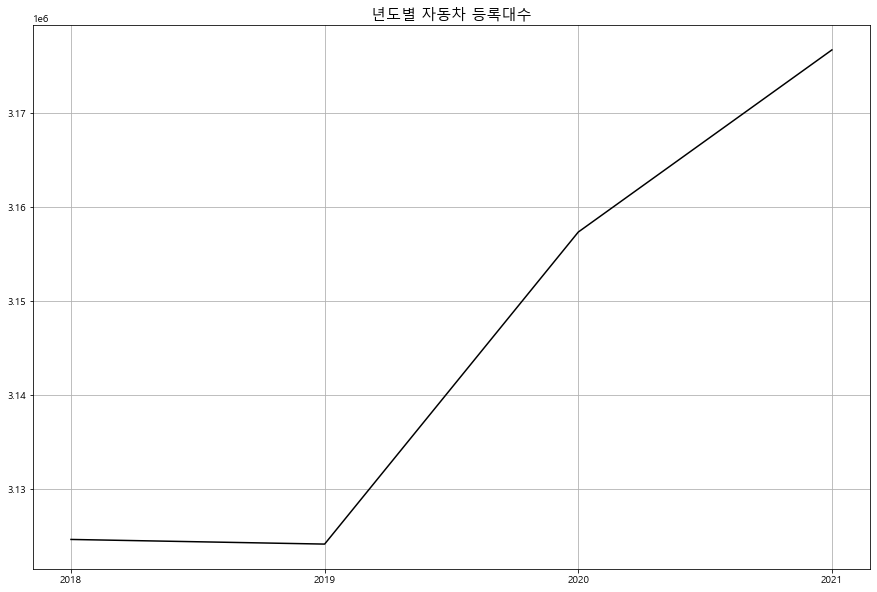

In [22]:
import numpy as np

# spot_ = 2018
# d_ = df3[(df3["기간"]==spot_) & (df["일시"].dt.month==9)]


plt.figure(figsize=(15,10))
plt.rc('font', family='Malgun Gothic', size = 10)
plt.title("년도별 자동차 등록대수" , fontsize=15)
plt.plot(df3["기간"], df3["자동차등록대수(전체)"], "-", color='black')
plt.grid()
plt.xticks([2018,2019,2020,2021])
plt.show()

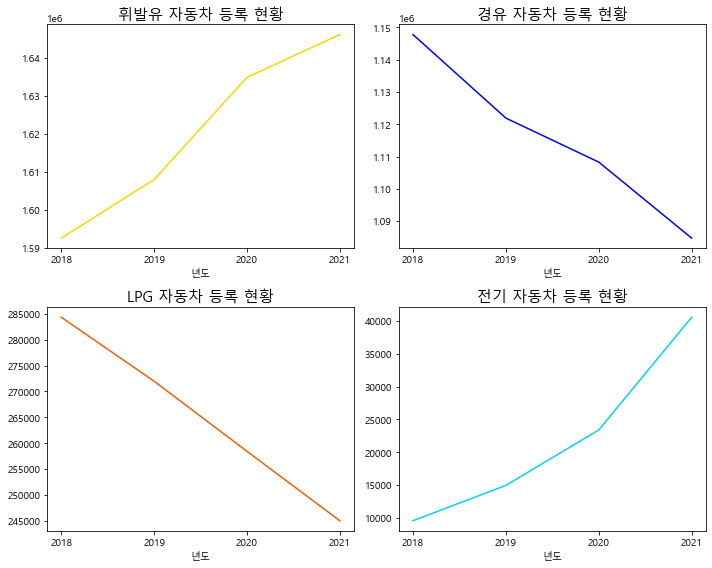

In [23]:
# plt.figure(figsize=(15,10))
# plt.title("년도별 전기차 등록대수" , fontsize=15)
# plt.plot(df3["기간"], df3["전기"], "-", color='blue')
# plt.grid()
# plt.xticks([2018,2019,2020,2021])
# plt.show()

plt.figure(figsize=(10,8)) # 먼저 창을 만들고
n=1
color_list = ['#ffd500','blue','#fc5a03','#03d3fc']
for spot_ in ['휘발유','경유','LPG','전기']:
    d_ = df4[(df4["연료"]==spot_)]
    ax = plt.subplot(2,2,n) # for문을 돌면서 Axes를 추가
    plt.title("%s 자동차 등록 현황" % spot_, fontsize=15)
    ax.plot(df3["기간"], df3[spot_], "-", color=color_list[n-1]) # 그래프 추가
    plt.xticks([2018,2019,2020,2021])
    plt.xlabel('년도')
    n+=1
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()

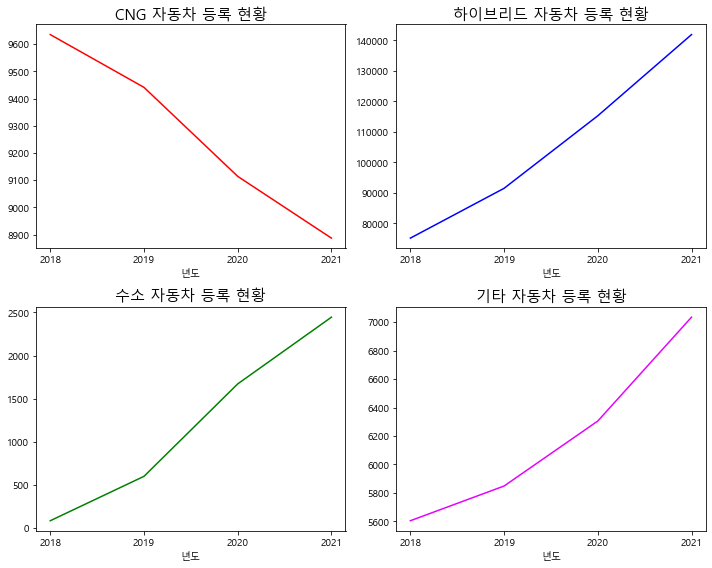

In [24]:
plt.figure(figsize=(10,8)) # 먼저 창을 만들고
n=1
color_list = ['red','blue','green','#e303fc']
for spot_ in ['CNG','하이브리드','수소','기타']:
    d_ = df4[(df4["연료"]==spot_)]
    ax = plt.subplot(2,2,n) # for문을 돌면서 Axes를 추가
    plt.title("%s 자동차 등록 현황" % spot_, fontsize=15)
    ax.plot(df3["기간"], df3[spot_], "-", color=color_list[n-1]) # 그래프 추가
    plt.xticks([2018,2019,2020,2021])
    plt.xlabel('년도')
    n+=1
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()

In [25]:
# # 충전소 정보 api (시간남으면 하기)

# import requests

# url = 'http://apis.data.go.kr/B552584/EvCharger/getChargerInfo'
# params ={'serviceKey' : 'CtFNdORsVsfnL5mw9qeUBn0ZoI99HOg3gpvyRWlatLXcG4F5zKL62gkGuw2mFY2lyu2sOzMDTB4Se3iasBBQsg%3D%3D',
#          'pageNo' : '1', 'numOfRows' : '10', 'zcode' : '11' }

# response = requests.get(url, params=params)
# print(response.content)

In [ ]:
# # 충전소 정보 api (시간남으면 하기)

# import pandas
# from bs4 import BeautifulSoup
# import requests
# from openpyxl.workbook import Workbook

# # API Key(인증키 - serviceKey)..
# apikey='CtFNdORsVsfnL5mw9qeUBn0ZoI99HOg3gpvyRWlatLXcG4F5zKL62gkGuw2mFY2lyu2sOzMDTB4Se3iasBBQsg%3D%3D'
# numOfRows = 9999
# pageNo = 1
# #period = 5
# zcode = 11


# # URL
# api = "http://apis.data.go.kr/B552584/EvCharger/getChargerInfo?serviceKey={key}&numOfRows={nrow}&pageNo={pno}&zcode={zd}"
       
# for i in range(0,1):
#     url = api.format(key=apikey, nrow=numOfRows, pno=pageNo, zd=zcode)
#     req= requests.get(url)
#     re = req.text
#     soup = BeautifulSoup(re, 'html.parser')
#     print(soup)

In [ ]:
#soup.find_all('addr')

In [ ]:
# dd = []
# for i in range(len(soup.find_all('addr'))):
#     dd.append(soup.find_all('addr')[i].text.split()[0]=='서울특별시')
# dd

In [52]:
# 무의미한 그래프 (잘못그림)


# sns.set_palette('pastel')

# sns.barplot(x='2018', y='2020',hue='연료', data=df4)
# # 전체 그래프 제목 넣기
# plt.title('서울 전기차 등록대수')
# # x축 이름 넣기
# plt.xlabel('년도')
# # y축 이름 넣기
# plt.ylabel('등록대수')

# plt.show()

In [53]:
# 무의미한 그래프 (잘못그림)


# sns.set_palette('pastel')
# # 글자 크기 지정
# plt.rc('font', family='Malgun Gothic', size = 10)
# sns.barplot(x='기간', y='전기',hue='자동차등록대수(전체)', data=df3)
# # 전체 그래프 제목 넣기
# plt.title('서울 전기차 등록대수')
# # x축 이름 넣기
# plt.xlabel('년도')
# # y축 이름 넣기
# plt.ylabel('등록대수')

# ss = df3['휘발유']

# plt.legend(('ss','경유','LPG','전기'))

# plt.show()

In [ ]:
#이주태